<a href="https://colab.research.google.com/github/Ishanavi/ProDataStory2/blob/main/ProDataStory2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_upload = files.upload()

Saving savings_data.csv to savings_data.csv


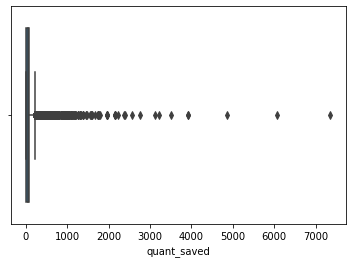

In [2]:
import seaborn as sns
import pandas as pd


df = pd.read_csv("savings_data.csv")

sns.boxplot(data = df,x=df["quant_saved"] )

In [3]:
q_1 = df["quant_saved"].quantile(0.25)
q_3 = df["quant_saved"].quantile(0.75)
iqr = q_3 - q_1
print(f"q_1 --> {q_1}")
print(f"q_3 --> {q_3}")
print(f"iqr --> {iqr}")

q_1 --> 2.284
q_3 --> 86.514
iqr --> 84.22999999999999


In [4]:
lower_whisker = q_1-1.5*iqr
upper_whisker = q_3+1.5*iqr
print(f"Upper Whisker --> {upper_whisker}")
print(f"Lower Whisker --> {lower_whisker}")

Upper Whisker --> 212.85899999999998
Lower Whisker --> -124.06099999999998


In [5]:
import statistics

new_df = df[df["quant_saved"]<upper_whisker]
new_all_savings = new_df["quant_saved"].tolist()
print(f"Mean --> {statistics.mean(new_all_savings)}")
print(f"Median --> {statistics.median(new_all_savings)}")
print(f"Mode --> {statistics.mode(new_all_savings)}")
print(f"Standard Deviation --> {statistics.stdev(new_all_savings)}")

Mean --> 46.20051938981879
Median --> 36.0475
Mode --> 0.0
Standard Deviation --> 50.86687191728863


In [6]:
import plotly.figure_factory as ff

fig = ff.create_distplot(
                          [new_all_savings],
                          ["Savings"],
                          show_hist = False
)
fig.show()

In [7]:
import random
import plotly.graph_objects as go

def randomSetOfMean(counter):
  dataset = []
  for i in range(0,counter):
    dataset.append(random.choice(new_all_savings))
  mean = statistics.mean(dataset)
  return mean

def showFig(mean_list):
  fig = ff.create_distplot(
                              [mean_list],
                              ["Savings"],
                              show_hist = False
  )
  fig.add_trace(go.Scatter(x=[mean_list,mean_list],y=[0,0.1], mode="lines", name="mean"))
  fig.show()

mean_list = []
for i in range(0,1000):
    set_of_mean = randomSetOfMean(100)
    mean_list.append(set_of_mean)
showFig(mean_list)
mean = statistics.mean(mean_list)
print("Sampling Mean --> ",mean)
print(f"Standard Deviation --> {statistics.stdev(mean_list)}")


Sampling Mean -->  46.11877154729313
Standard Deviation --> 5.006673518170908


In [8]:
print(f"Population Mean --> {statistics.mean(new_all_savings)}")
print(f"Sampling Mean --> {statistics.mean(mean_list)}")

Population Mean --> 46.20051938981879
Sampling Mean --> 46.11877154729313


In [11]:
import numpy as np

temp_df = new_df[new_df.highschool_completed!=0]
age = temp_df["highschool_completed"].tolist()
savings = temp_df["quant_saved"].tolist()

corr = np.corrcoef(age,savings)
print(f"Correlation between higschool completed and savings --> {corr[0,1]}")

Correlation between higschool completed and savings --> nan


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning:

invalid value encountered in true_divide



In [12]:
hs_df = new_df.loc[new_df["highschool_completed"]==1]
not_hs_df = new_df.loc[new_df["highschool_completed"]==0]
print(hs_df.head())
print(not_hs_df.head())

   quant_saved  female  highschool_completed  wealthy
1      39.2724       0                     1        1
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
0     13.090800       1                     0        0
9     52.363200       1                     0        0
28    47.178078       0                     0        0
29    98.181000       0                     0        0
38    39.272400       1                     0        0


In [14]:
import plotly.graph_objects as go

not_hs_savings = not_hs_df["quant_saved"].tolist()
sampling_mean_list_not_hs = []

for i in range(0,1000):
  temp_list = []
  for j in range(0,100):
    temp_list.append(random.choice(not_hs_savings))
  sampling_mean_list_not_hs.append(statistics.mean(temp_list))

mean_sampling_not_hs = statistics.mean(sampling_mean_list_not_hs)
stdev_sampling_not_hs = statistics.stdev(sampling_mean_list_not_hs)
print(f"Mean of sampling who did not complete highschool --> {mean_sampling_not_hs}")
print(f"Standard Deviation of sampling who did not complete highschool --> {stdev_sampling_not_hs}")

fig = ff.create_distplot([sampling_mean_list_not_hs],["sampling mean list who did not complete highschool"], show_hist = False)
fig.add_trace(go.Scatter(x=[mean_list,mean_list],y=[0,0.1], mode="lines", name="mean"))
fig.show()

Mean of sampling who did not complete highschool --> 45.54992955316117
Standard Deviation of sampling who did not complete highschool --> 5.079895897762421


In [15]:
hs_savings = hs_df["quant_saved"].tolist()
sampling_mean_list_hs = []

for i in range(0,1000):
  temp_list = []
  for j in range(0,100):
    temp_list.append(random.choice(hs_savings))
  sampling_mean_list_hs.append(statistics.mean(temp_list))

mean_sampling_hs = statistics.mean(sampling_mean_list_hs)
stdev_sampling_hs = statistics.stdev(sampling_mean_list_hs)
print(f"Mean of sampling who completed highschool --> {mean_sampling_hs}")
print(f"Standard Deviation of sampling who completed highschool --> {stdev_sampling_hs}")

fig = ff.create_distplot([sampling_mean_list_hs],["sampling mean list who completed highschool"], show_hist = False)
fig.add_trace(go.Scatter(x=[mean_list,mean_list],y=[0,0.1], mode="lines", name="mean"))
fig.show()

Mean of sampling who completed highschool --> 47.02032003872403
Standard Deviation of sampling who completed highschool --> 5.1100301160024175


In [16]:
z_score = (mean_sampling_hs - mean_sampling_not_hs)/stdev_sampling_not_hs
print(f"Z score --> {z_score}")

Z score --> 0.2894528776092701
